In [1]:
# According to The Economic Times:

# The government has recognised 41,061 startups as of December 23, 2020, according to the Economic Survey 2020-21 tabled in Parliament on Jan 29,2021. Of this, more than 39,000 startups have reported 4,70,000 jobs, the survey said, without disclosing details.India currently houses the world's third largest startup ecosystem, with 38 firms being valued at over 1 billion dollars, or what is known as unicorns.

# In recent years, the government has taken several measures to support startups, including broadening the definition of startups, simplifying regulations, providing income tax exemptions and setting up a Rs 10,000 crore Fund of Funds for startups operated by the Small Industries Development Bank of India (Sidbi).

# As of December 1, 2020, Sidbi had committed Rs 4,326.95 crore to 60 Sebi-registered Alternative Investment Funds (AIFs).

# These funds have raised a corpus of Rs 31,598 crore, drawn Rs 1,270.46 crore from the Fund of Funds for Startups and invested Rs 4,509.16 crore into 384 startups, the survey said.

# It also noted that around 319 startups have been granted income tax exemptions till November 2020.

# Startup Yatra, an initiative by Startup India in 2017 to search for entrepreneurial talent in Tier 2 and Tier 3 cities, has been conducted in 207 districts across 23 states, impacting 78,346 aspiring entrepreneurs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [3]:
startups = pd.read_csv('2021_registered_companies.csv')

The Data contains 9 object datatype and 3 float datatype.

In [4]:
startups.head(3)

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19-01-2021,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000,102000,45309,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25-01-2021,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000,3000,74994,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14-01-2021,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000,500000,65990,Finance


In [5]:
startups.shape

(54892, 12)

In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54892 entries, 0 to 54891
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_uid           54892 non-null  object
 1   date_of_registration  54892 non-null  object
 2   month_name            54892 non-null  object
 3   state                 54892 non-null  object
 4   roc                   54892 non-null  object
 5   category              54892 non-null  object
 6   class                 54892 non-null  object
 7   company_type          54892 non-null  object
 8   authorized_capital    54892 non-null  int64 
 9   paidup_capital        54892 non-null  int64 
 10  activity_code         54892 non-null  int64 
 11  activity_description  54892 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


In [7]:
# Converting Float into Int
startups[["authorized_capital","paidup_capital","activity_code"]] = startups[["authorized_capital","paidup_capital","activity_code"]].astype("int32")


In [8]:
startups[["authorized_capital","paidup_capital","activity_code"]][0:3]

,authorized_capital,paidup_capital,activity_code
0,1500000,102000,45309
1,100000,3000,74994
2,500000,500000,65990


In [9]:
startups.isnull().sum()

company_uid             0
date_of_registration    0
month_name              0
state                   0
roc                     0
category                0
class                   0
company_type            0
authorized_capital      0
paidup_capital          0
activity_code           0
activity_description    0
dtype: int64

In [10]:
for col in startups.columns:
    print(col)

company_uid
date_of_registration
month_name
state
roc
category
class
company_type
authorized_capital
paidup_capital
activity_code
activity_description


#### **Column Date_of_registration**

In [11]:
Data = startups["date_of_registration"].str[0:2].value_counts()
Data = Data.sort_index()
Dates = Data.keys()
Reg = Data.tolist()

In [12]:
print(Dates)
print(Reg)


Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')
[1666, 1662, 1643, 1933, 1938, 1937, 1047, 2732, 2747, 1848, 1652, 2612, 1704, 1132, 2218, 1934, 1644, 1819, 2672, 2025, 1332, 2814, 2377, 1608, 2065, 1830, 1273, 685, 562, 1097, 684]


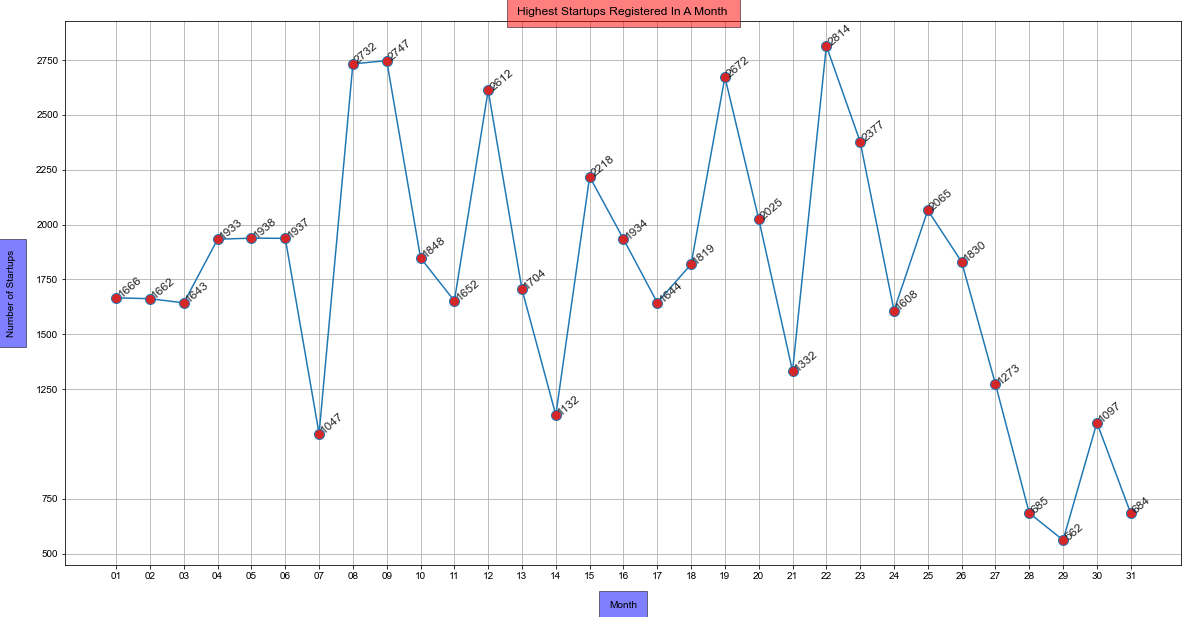

In [13]:
plt.figure(figsize=(20,10))
plt.grid()
plt.yticks([250,500,750,100,1250,1500,1750,2000,2250,2500,2750,3000])
plt.xlabel("Month", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.ylabel("Number of Startups", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.title("Highest Startups Registered In A Month ", bbox={"facecolor":"red", "alpha":0.5, "pad":10})

sbn.set_theme(style="dark")
# sbn.lineplot(x=Dates,y=Reg, marker="o", markersize = 10,markerfacecolor="tab:red")
plt.plot(Dates,Reg, marker='o',markersize = 10,markerfacecolor="tab:red")
for index,value in enumerate(Reg):
    plt.text(index,value,str(value),rotation=40)
    
plt.show()


The chart shows the period of dates combined of four months. It shows on which date of the months are the registrations are higher and lower.

#### **Column month name**

In [14]:
char = startups["month_name"].value_counts().keys()
val = startups["month_name"].value_counts().tolist()
values = np.array(val)
print(char)
print(val)
print(values)

Index(['Mar-21', 'Feb-21', 'Apr-21', 'Jan-21'], dtype='object')
[17323, 14092, 12553, 10924]
[17323 14092 12553 10924]


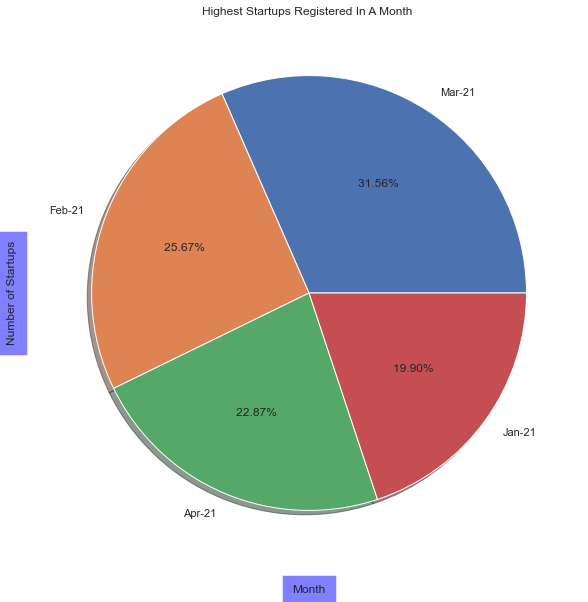

In [15]:
plt.figure(figsize=(10,10))
plt.grid()
plt.xlabel("Month", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.ylabel("Number of Startups", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.title("Highest Startups Registered In A Month ")


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% '.format(p=pct)
    return my_autopct

sbn.set_theme(style="dark")
plt.pie(val,labels=char, autopct=make_autopct(values), shadow=True)
plt.show()

March month has the highest number of registered startups

#### **Column state**

In [16]:
startups["state"].value_counts().keys()

Index(['Maharashtra', 'Uttar Pradesh', 'Delhi', 'Karnataka', 'Telangana',
       'Tamil Nadu', 'MH', 'Gujarat', 'Haryana', 'West Bengal', 'Kerala', 'UP',
       'Bihar', 'Rajasthan', 'DL', 'Madhya Pradesh', 'KA', 'TG',
       'Andhra Pradesh', 'TN', 'Orissa', 'GJ', 'HR', 'WB', 'Punjab', 'KL',
       'BR', 'RJ', 'Jharkhand', 'MP', 'Assam', 'Uttarakhand', 'Chattisgarh',
       'AP', 'OR', 'Jammu & Kashmir', 'JH', 'PB', 'Himachal Pradesh',
       'Chandigarh', 'AS', 'CT', 'UR', 'Goa', 'JK', 'Manipur', 'HP', 'CH',
       'GA', 'Pondicherry', 'Tripura', 'Arunachal Pradesh', 'Meghalaya',
       'Nagaland', 'Dadra & Nagar Haveli', 'TR', 'MN', 'PY',
       'Andaman & Nicobar', 'Daman and Diu', 'Mizoram', 'AR', 'NL', 'AN', 'DN',
       'MZ', 'LD', 'ML', 'LH', 'Lakshadweep'],
      dtype='object')

In [17]:
state_code ={'MH':  'Maharashtra'
,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'
,'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
,'JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Jammu & Kashmir'
,'DD': 'Daman and Diu'
     }

In [18]:
startups.replace({"state":state_code}, inplace=True)


In [19]:
state_names = startups["state"].value_counts().keys()
reg_values = startups["state"].value_counts().tolist()

print(state_names)
print(reg_values)

Index(['Maharashtra', 'Uttar Pradesh', 'Delhi', 'Karnataka', 'Telangana',
       'Tamil Nadu', 'Gujarat', 'Haryana', 'West Bengal', 'Kerala', 'Bihar',
       'Rajasthan', 'Madhya Pradesh', 'Andhra Pradesh', 'Orissa', 'Punjab',
       'Jharkhand', 'Assam', 'Chattisgarh', 'Uttarakhand', 'Jammu & Kashmir',
       'Himachal Pradesh', 'Chandigarh', 'Goa', 'Manipur', 'Pondicherry',
       'Tripura', 'Arunachal Pradesh', 'Nagaland', 'Dadra & Nagar Haveli',
       'Meghalaya', 'Andaman & Nicobar', 'Daman and Diu', 'Mizoram',
       'Lakshadweep'],
      dtype='object')
[10077, 5772, 5449, 4213, 3655, 3515, 3057, 2705, 2551, 2084, 1997, 1979, 1578, 1184, 1110, 771, 647, 440, 437, 432, 332, 244, 220, 153, 83, 49, 39, 23, 21, 18, 18, 15, 11, 10, 3]


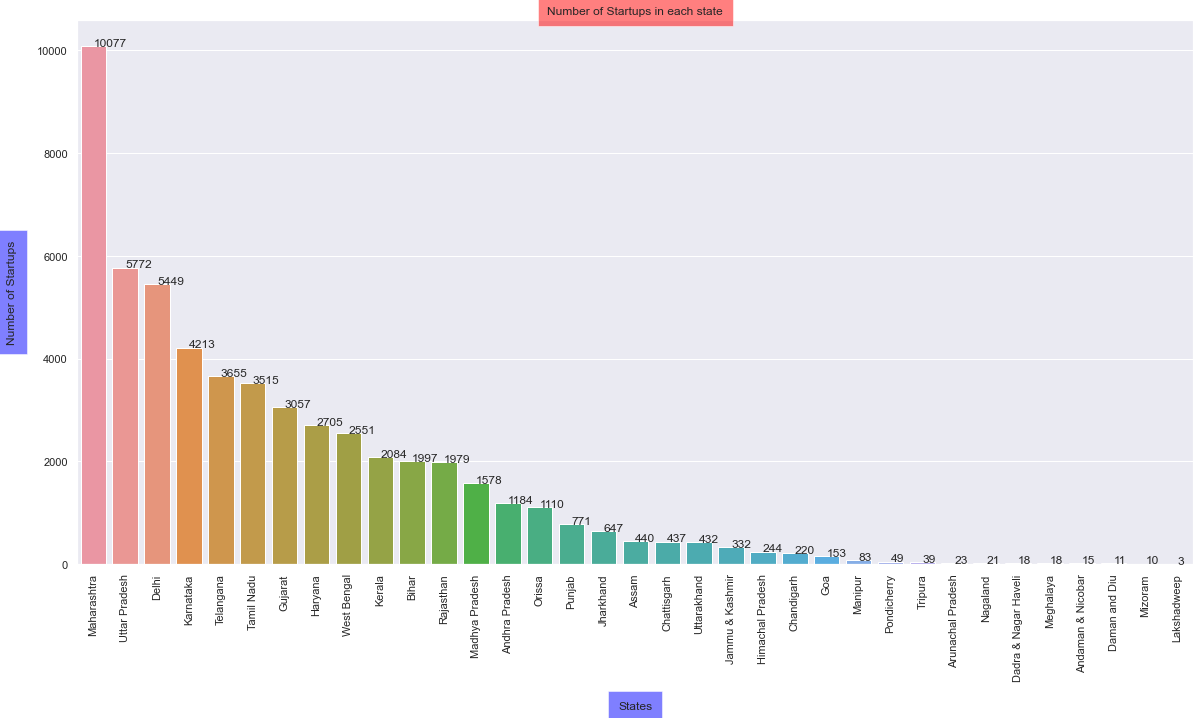

In [20]:
plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel("States", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.ylabel("Number of Startups", bbox={"facecolor":"blue", "alpha":0.5, "pad":10}, labelpad=20)
plt.title("Number of Startups in each state", bbox={"facecolor":"red", "alpha":0.5, "pad":10})
plt.xticks(rotation = "vertical")

sbn.set_theme(style="dark")
sbn.barplot(x=state_names,y=reg_values)



for index,value in enumerate(reg_values):
    plt.text(index,value, str(value))

plt.show()



Maharasthtra has the highest number of startups registered

In [21]:
startups["roc"].value_counts()

RoC-Delhi              8154
RoC-Mumbai             6788
RoC-Kanpur             5772
RoC-Bangalore          4213
RoC-Hyderabad          3655
RoC-Pune               3289
RoC-Ahmedabad          3075
RoC-Chennai            2689
RoC-Kolkata            2551
RoC-Ernakulam          2087
RoC-Patna              1997
RoC-Jaipur             1979
RoC-Gwalior            1578
RoC-Vijayawada         1184
RoC-Cuttack            1110
RoC-Chandigarh          991
RoC-Coimbatore          826
RoC-Jharkhand           647
RoC-Shillong            634
RoC-Chhattisgarh        437
RoC-Uttarakhand         432
RoC-Jammu               332
RoC-HimachalPradesh     244
RoC-Goa                 164
RoC-Pondicherry          49
RoC-Andaman              15
Name: roc, dtype: int64

In [22]:
roc = startups["roc"].value_counts().keys()
values = startups["roc"].value_counts().tolist()

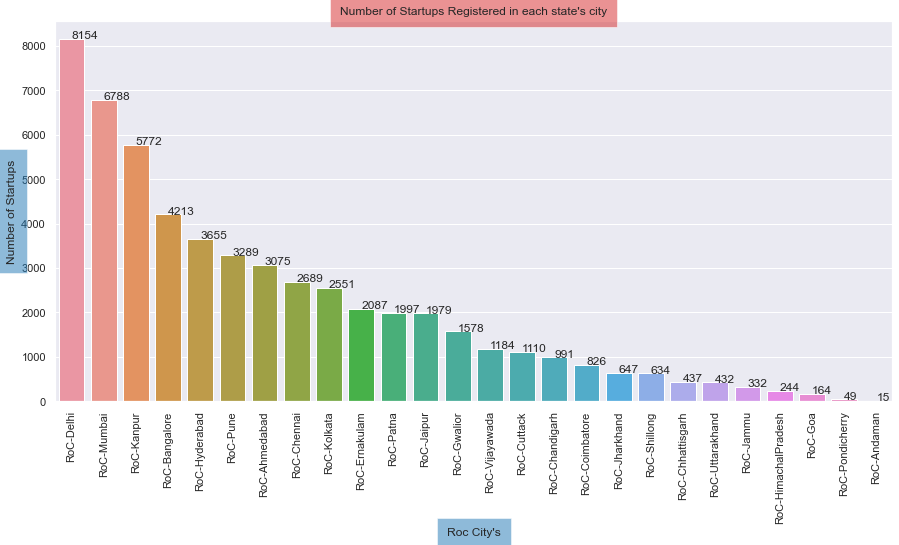

In [23]:
plt.figure(figsize=(15,7))
plt.grid()
plt.xlabel("Roc City's",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Number of Startups Registered in each state's city",bbox={"facecolor":"tab:red","alpha":0.5,"pad":10})
plt.xticks(rotation = "vertical")

sbn.set_theme(style="dark")
sbn.barplot(x=roc,y=values)

for index,value in enumerate(values):
    plt.text(index,value, str(value))
    
plt.show()

**Column Category**

In [24]:
startups[["state","category"]].value_counts()[0:10]

state          category                 
Maharashtra    Company limited by Shares    9993
Uttar Pradesh  Company limited by Shares    5747
Delhi          Company limited by Shares    5421
Karnataka      Company limited by Shares    4190
Telangana      Company limited by Shares    3633
Tamil Nadu     Company limited by Shares    3492
Gujarat        Company limited by Shares    3040
Haryana        Company limited by Shares    2699
West Bengal    Company limited by Shares    2537
Kerala         Company limited by Shares    2079
dtype: int64

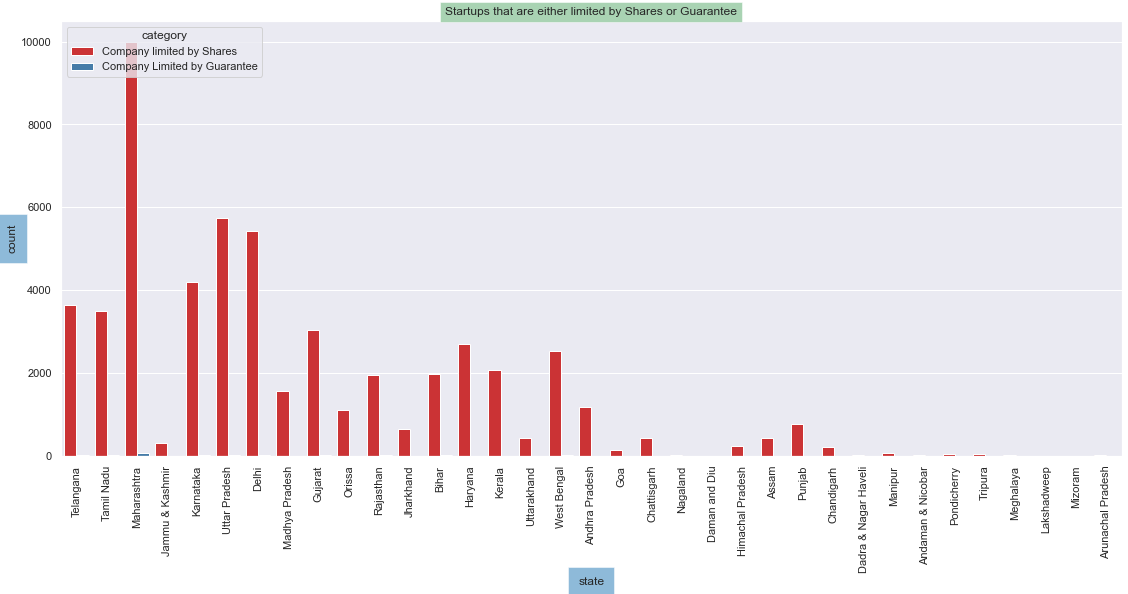

In [25]:
plt.figure(figsize=(19,8))
plt.grid()
plt.xticks(rotation = 90)
plt.xlabel("",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Startups that are either limited by Shares or Guarantee",bbox={"facecolor":"g","alpha":0.5,"pad":5})

sbn.countplot(x=startups["state"],hue=startups["category"], palette = "Set1")


plt.show()


Looks like there are more startups limited by shares then companies limited guarantee in each states.

#### **Column Class**

In [26]:
startups["class"].value_counts()

Private                        50455
Private(One Person Company)     3277
Public                          1160
Name: class, dtype: int64

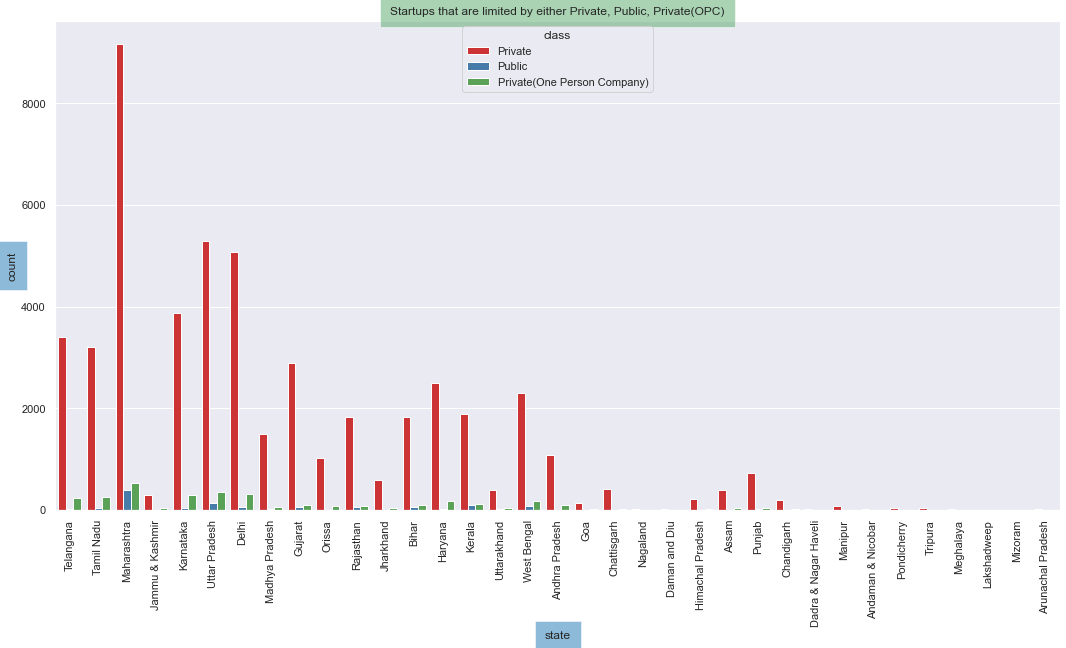

In [27]:
plt.figure(figsize=(18,9))
plt.grid()
plt.xticks(rotation = 90)
plt.xlabel("States",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number Of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Startups that are limited by either Private, Public, Private(OPC)",bbox={"facecolor":"g","alpha":0.5,"pad":10})



sbn.countplot(x=startups["state"],hue=startups["class"], palette = "Set1")
plt.show()

The Above Chart Shows Whether the Startup is Private, Public or Private(One Person Company) in Each State.

#### **Column Company_Type**

In [28]:
startups["company_type"].value_counts()

Non-govt company                  54387
Subsidiary of Foreign Company       430
Guarantee and Association comp       50
State Govt company                   19
Union Govt company                    6
Name: company_type, dtype: int64

In [29]:
Company_Type = startups["company_type"].value_counts().keys()
Company_values = startups["company_type"].value_counts().tolist()

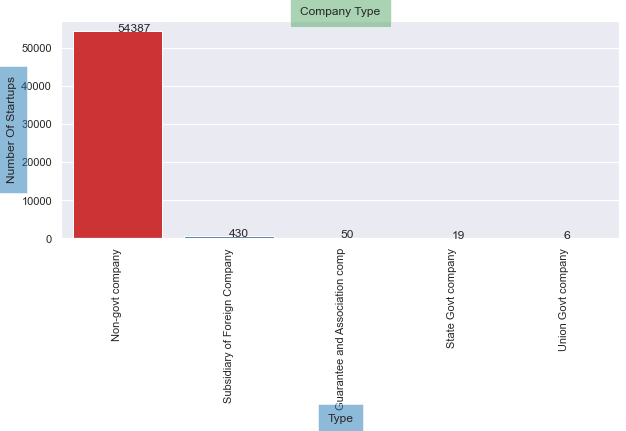

In [30]:
plt.figure(figsize=(10,4))
plt.grid()
plt.xticks(rotation=90)
plt.xlabel("Type",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number Of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Company Type",bbox={"facecolor":"g","alpha":0.5,"pad":10})


sbn.barplot(x=Company_Type,y=Company_values ,palette = "Set1")
for index,value in enumerate(Company_values):
    plt.text(index,value, str(value))

plt.show()

The Above Chart Shows Whether the Startup is Non-govt company ,Subsidiary of Foreign Company,Guarantee and Association company, State Govt company,Union Govt company

#### **Column Description**

In [31]:
Type = startups["activity_description"].value_counts().keys()
Val = startups["activity_description"].value_counts().tolist()

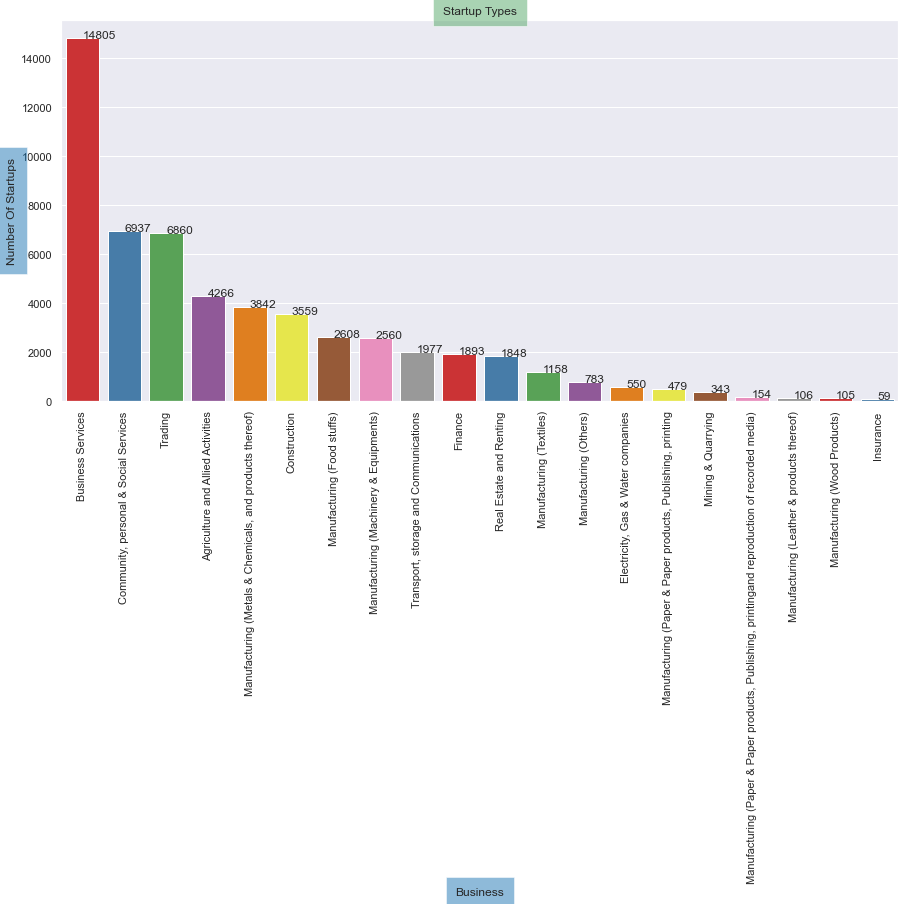

In [32]:
plt.figure(figsize=(15,7))
plt.grid()
plt.xticks(rotation=90)
plt.xlabel("Business",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.ylabel("Number Of Startups",bbox={"facecolor":"tab:blue","alpha":0.5,"pad":10})
plt.title("Startup Types",bbox={"facecolor":"g","alpha":0.5,"pad":10})

sbn.barplot(x=Type,y=Val ,palette = "Set1")
for index,value in enumerate(Val):
    plt.text(index,value, str(value))

plt.show()

The Chart Shows What the Startup's Business is Based on and Which Type of Business and Which has the Highest Registeration and Lowest Registration.